In [62]:
# Nguyễn Hữu Thâu - 19146265
# Lớp chiều thứ 5 - tiết 10 - 12

In [63]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Drive/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Drive/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')


Mounted at /content/drive
Found 60 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [66]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))

model.add(Dense(8,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 32,
                  epochs=10,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/10
2/2 [==============================] - 3s 2s/step - loss: 7.7862 - accuracy: 0.1167 - val_loss: 3.5782 - val_accuracy: 0.3625
Epoch 2/10
2/2 [==============================] - 2s 2s/step - loss: 2.5587 - accuracy: 0.3500 - val_loss: 2.6045 - val_accuracy: 0.1000
Epoch 3/10
2/2 [==============================] - 2s 2s/step - loss: 1.8086 - accuracy: 0.4667 - val_loss: 1.8806 - val_accuracy: 0.2250
Epoch 4/10
2/2 [==============================] - 2s 2s/step - loss: 1.3028 - accuracy: 0.6167 - val_loss: 1.5550 - val_accuracy: 0.4500
Epoch 5/10
2/2 [==============================] - 2s 2s/step - loss: 0.8005 - accuracy: 0.8167 - val_loss: 1.9393 - val_accuracy: 0.3500
Epoch 6/10
2/2 [==============================] - 2s 2s/step - loss: 0.3490 - accuracy: 0.8500 - val_loss: 1.8404 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 3s 2s/step - loss: 0.2062 - accuracy: 0.8833 - val_loss: 1.5365 - val_accuracy: 0.4250
Epoch 8/10
2/2 [=========================

In [68]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  2.4706358909606934
Độ chính xác kiểm tra là:  0.4375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


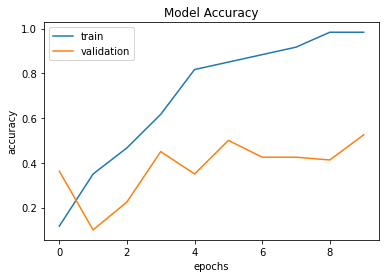

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [71]:
model.save('model_fruit.h5')

In [72]:
from tensorflow.keras.models import load_model
model=load_model('model_fruit.h5')

In [73]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

In [83]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from google.colab import files 
uploadfile=files.upload()


Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jfif to 13.jfif
Saving 14.jpg to 14.jpg
Saving 55.jpg to 55.jpg


In [96]:
fruit = ['chuối','táo','bơ','dâu','bắp','dưa hấu','quýt','thanh long','xoài']

0
chuối


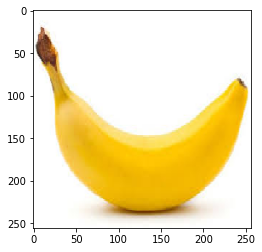

In [99]:
img = load_img("10.jpg",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
traicay=np.argmax(model.predict(img),axis=1)
print(np.argmax(img))
if traicay==0:
  print(fruit[0])
else: print(fruit[1])

In [100]:
np.argmax(model.predict(img),axis=1)

array([0])